In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install regex
!pip install nltk
!pip install gensim
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install regex

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import gensim
from gensim.parsing.preprocessing import remove_stopwords

from tensorflow.keras import models, layers, regularizers, preprocessing as kprocess
from tensorflow.keras import backend as K

In [5]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [93]:
nltk.download('punkt')
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')
NUM_FEATURES = 1000
INPUT_LENGTH = 50
_STUDENT_NUM = 'A0168932U'
vocab = {} # TODO: Settle the OOV/invalid word token.
word_counter = 1
dic_y_mapping = {}
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
scaler = StandardScaler(with_mean=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ongwe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ongwe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
import os
import glob
path = '/train'
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
frames = []
train = pd.read_csv('train.csv', index_col=None, sep=',', engine='python',)

test = pd.read_csv('test.csv', index_col=None, sep=',', engine='python')
# print(df_train)
# print(df_test)

Text(0.5, 0, 'Verdict')

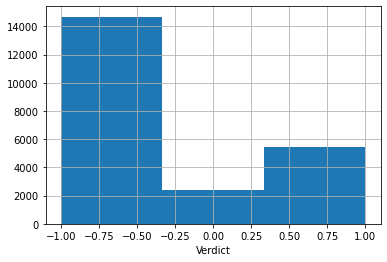

In [29]:
fig = train.Verdict.hist(bins=3)
fig.set_xlabel('Verdict')

In [33]:
# preprocess data
print(train['Text'])
preprocess(train['Text'])
print(max(len()))

0            I think we've seen a deterioration of values.
1        I think for a while as a nation we condoned th...
2        For a while, as I recall, it even seems to me ...
3        So we've seen a deterioration in values, and o...
4        We got away, we got into this feeling that val...
                               ...                        
22496                   You get shot walking to the store.
22497    I will do more for African-Americans and Latin...
22498    All she's done is talk to the African-American...
22499    We are going to make America strong again, and...
22500    We cannot take four more years of Barack Obama...
Name: Text, Length: 22501, dtype: object


0                          think seen deterioration values
1                   think nation condoned things condemned
2        recall even seems talk legalizing decriminaliz...
3        seen deterioration values one things think ter...
4                got away got feeling free education thing
                               ...                        
22496                               get shot walking store
22497                               latinos ever lifetimes
22498    done talk latinos get vote come back say see f...
22499    going make america strong going make america g...
22500                 take four years barack obama get get
Length: 22501, dtype: object

In [71]:
ngrams = feat_eng(preprocess(train['Text']))

In [90]:
print(len(vocab))

10772


In [45]:
# Using Skip-Gram
nlp = gensim.models.word2vec.Word2Vec(ngrams[0], size=NUM_FEATURES,   
            window=8, min_count=1, sg=1, iter=30)

In [52]:
nlp.most_similar(positive=['years'], topn = 3)

<ipython-input-52-7130f7a6ea11>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  nlp.most_similar(positive=['years'], topn = 3)


[('eight', 0.5278221368789673),
 ('voicing', 0.47630441188812256),
 ('churchill', 0.457365483045578)]

In [69]:
tokenizer = kprocess.text.Tokenizer(lower=True, split=' ', 
                        oov_token="NaN", 
                        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(ngrams[0])
ngram_test = feat_eng(preprocess(test['Text']))
# tokenizer.fit_on_texts(ngram_test[0])
vocab = tokenizer.word_index
print(vocab)

{'NaN': 1, 'people': 2, 'think': 3, 'going': 4, 'president': 5, 'would': 6, 'one': 7, 'get': 8, 'make': 9, 'want': 10, 'know': 11, 'said': 12, 'country': 13, 'uh': 14, 'years': 15, 'got': 16, 'us': 17, 'well': 18, 'say': 19, 'tax': 20, 'america': 21, 'go': 22, 'world': 23, 'believe': 24, 'time': 25, 'let': 26, 'way': 27, 'states': 28, 'government': 29, 'american': 30, 'like': 31, 'right': 32, 'need': 33, 'united': 34, 'first': 35, 'also': 36, 'take': 37, 'money': 38, 'jobs': 39, 'work': 40, 'plan': 41, 'back': 42, 'senator': 43, 'things': 44, 'look': 45, 'sure': 46, 'could': 47, 'care': 48, 'year': 49, 'made': 50, 'good': 51, 'last': 52, 'new': 53, 'health': 54, 'governor': 55, 'done': 56, 'percent': 57, 'cut': 58, 'lot': 59, 'better': 60, 'security': 61, 'see': 62, 'put': 63, 'billion': 64, 'administration': 65, 'help': 66, 'give': 67, 'ca': 68, 'every': 69, 'war': 70, 'great': 71, 'important': 72, 'congress': 73, 'ought': 74, 'thing': 75, 'economy': 76, 'million': 77, 'two': 78, 'que

In [100]:
## create sequence
text2seq= tokenizer.texts_to_sequences(ngrams[0])
## padding sequence
X_train = kprocess.sequence.pad_sequences(text2seq, 
                    maxlen=INPUT_LENGTH, padding="post", truncating="post")

X_test = kprocess.sequence.pad_sequences(tokenizer.texts_to_sequences(ngram_test[0]), 
                    maxlen=INPUT_LENGTH, padding="post", truncating="post")
print(len(X_train))
print(X_test)

22501
[[  11  507 4488 ...    0    0    0]
 [3865   57   23 ...    0    0    0]
 [ 194  299 3123 ...    0    0    0]
 ...
 [  18  194    0 ...    0    0    0]
 [  45  289 1371 ...    0    0    0]
 [1753   66    0 ...    0    0    0]]


In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
tfidf = TfidfVectorizer(stop_words='english', analyzer=lambda x: x)
print(tfidf)
tfidf.fit(ngrams[0])
print(tfidf)
max_idf = max(tfidf.idf_)
#word2weight: dictionary mapping wordID --> tfidf weight
word2weight = defaultdict(
        lambda: max_idf, 
        [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])
word2weight.values()

TfidfVectorizer(analyzer=<function <lambda> at 0x0000024C8B812700>,
                stop_words='english')
TfidfVectorizer(analyzer=<function <lambda> at 0x0000024C8B812700>,
                stop_words='english')


dict_values([3.498959241743892, 6.153825022675434, 9.411921560696916, 6.651911620663996, 5.456839065808324, 10.328212292571072, 4.864380487545462, 9.411921560696916, 8.623464200332647, 5.437863164349318, 6.894225088085926, 5.553299331995886, 9.229600003902963, 10.328212292571072, 9.229600003902963, 6.416189287142926, 6.004079636316093, 4.002062819415973, 6.426239622996428, 7.1295391750203905, 9.635065112011127, 5.822862441865191, 3.425469555412479, 5.977934356211771, 4.30476469961004, 6.086885540000325, 7.802483648262816, 6.004079636316093, 5.37591257548778, 5.19241385552081, 4.506646782258487, 7.070115754549589, 6.116084694692588, 9.922747184462908, 6.010724179034761, 5.728054648406525, 5.862304173916488, 4.073422404516048, 5.055212734007325, 6.161547068769345, 8.941917931451181, 5.024907384511996, 8.130987715234852, 7.802483648262816, 7.976837035407594, 4.032024207156457, 9.922747184462908, 5.8064237155220315, 6.209175117758599, 8.076920493964577, 6.831704731104591, 9.075449324075704

In [416]:
## !/usr/bin/env python.

def train_model(model, X_train, y_train):
    ''' TODO: train your model based on the training data '''
    global dic_y_mapping
    sm = SMOTE(random_state=42)
    # X = scaler.fit_transform(X_train)
    X_smote, y_smote = sm.fit_resample(X_train, y_train)
    dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_smote))}
    inverse_dic = {v:k for k,v in dic_y_mapping.items()}
    y_smote = np.array([inverse_dic[y] for y in y_smote])
    training = model.fit(X_smote, y_smote)
    # print(Counter(y_smote))
    # class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
    ## train
    training = model.fit(x=X_smote, y=y_smote, batch_size=256, 
                     epochs=100, shuffle=True, verbose=1, 
                     validation_split=0.3)
    # from sklearn.model_selection import cross_val_score
    # from sklearn.model_selection import RepeatedStratifiedKFold
    # define the model evaluation procedure
    # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # # evaluate the model and collect the scores
    # n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # training = model.fit(X_smote, y_smote)


def predict(model, X_test):
    ''' TODO: make predictions here '''
    global dic_y_mapping
    prob = model.predict(X_test)
    return [dic_y_mapping[np.argmax(pred)] for pred in 
             prob]

def generate_result(test, y_pred, filename):
    ''' generate csv file base on the y_pred '''
    test['Verdict'] = pd.Series(y_pred)
    test.drop(columns=['Text'], inplace=True)
    test.to_csv(filename, index=False)

def main():
    ''' load train, val, and test data '''
    x_input = layers.Input(shape=(INPUT_LENGTH,))
    x = layers.Embedding(input_dim=embeddings.shape[0], output_dim=embeddings.shape[1],weights=[embeddings],input_length=INPUT_LENGTH, trainable = False)(x_input)
    x = layers.Flatten()(x)
    x = layers.Dense(6, activation='relu', activity_regularizer=regularizers.l1(0.0001))(x)
    x = layers.Dropout(0.5)(x)
    y_out = layers.Dense(3, activation='softmax')(x)
    model = models.Model(x_input, y_out)

    model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

    model.summary()

    
    tokenizer = kprocess.text.Tokenizer(lower=True, split=' ', 
                        oov_token="NaN", 
                        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
    tokenizer.fit_on_texts(ngrams[0])
    vocab = tokenizer.word_index
    # print('vocab size is {}', len(vocab))
    ## create sequence
    lst_text2seq = tokenizer.texts_to_sequences(ngrams[0])
    ## padding sequence
    X_train = kprocess.sequence.pad_sequences(lst_text2seq, 
                        maxlen=INPUT_LENGTH, padding="post", truncating="post")
    y_train = train['Verdict']
    train_model(model, X_train, y_train)
    # test your model
    y_pred = predict(model, X_train)

    # Use f1-macro as the metric
    score = f1_score(y_train, y_pred, average='macro')
    print('score on validation = {}'.format(score))
    print(confusion_matrix(y_train, y_pred))
   
    # generate prediction on test data
    test = pd.read_csv('test.csv')
    X_test = preprocess(test['Text'])
    y_pred = predict(model, X_test)
    generate_result(test, y_pred, _STUDENT_NUM + ".csv")

# Allow the main class to be invoked if run as a file.
if __name__ == "__main__":
    main()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 15)]              0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 15, 301)           3242673   
_________________________________________________________________
flatten_5 (Flatten)          (None, 4515)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 27096     
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 21        
Total params: 3,269,790
Trainable params: 27,117
Non-trainable params: 3,242,673
____________________________________________

KeyboardInterrupt: 

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key."""

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

class ArrayCaster(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, data):
#     print data.shape
#     print np.transpose(np.matrix(data)).shape
        return np.transpose(np.matrix(data))

In [47]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ongwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ongwe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ongwe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ongwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ongwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ongwe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [49]:
# Create feature dict for sentiment polarity score of words
from textblob import TextBlob
sentidict = {}
def get_polarity(word):
    tb = TextBlob(word)
    return tb.polarity

def get_subjectivity(word):
    tb = TextBlob(word)
    return tb.subjectivity

def get_num_nouns(sent):
    tb = TextBlob(sent)
    return len(tb.noun_phrases)

def get_num_adj(sent):
    tb = TextBlob(sent)
    count = 0
    for tag in tb.tags:
        if re.search(r"\bJJ", tag[1]):
            count += 1
    return count

def get_num_adv(sent):
    tb = TextBlob(sent)
    count = 0
    for tag in tb.tags:
        if re.search(r"\bRB", tag[1]):
            count += 1
    return count

def get_num_vb(sent):
    tb = TextBlob(sent)
    count = 0
    for tag in tb.tags:
        if re.search(r"\bVB", tag[1]):
            count += 1
    return count

def add_features(data):
    polarity = [get_polarity(sent) for sent in data.Text]
    subjectivity = [get_subjectivity(sent) for sent in data.Text]
    num_nouns = [get_num_nouns(sent) for sent in data.Text]
    num_adj = [get_num_adj(sent) for sent in data.Text]
    num_adv = [get_num_adv(sent) for sent in data.Text]
    num_vb = [get_num_vb(sent) for sent in data.Text]
    df = data.copy()
    df["Polarity"] = polarity
    df["Subjectivity"] = subjectivity
    df["NumNouns"] = num_nouns
    df["NumAdv"] = num_adv
    df["NumAdj"] = num_adj
    df["NumVb"] = num_vb
    return df

# vect = tfidf.fit_transform(train.Text.values)
# vocab = tfidf.get_feature_names()
# for word in vocab:
#     sentidict[word] = get_polarity(word)

In [94]:
def preprocess(X_train):
    ''' Remove stop words, punctuations, and do normalizations '''
    
    X_train_clean = []
    for sentence in X_train:
        tokens = []
#         tokens += word_tokenize(sentence.lower())
        tokens += word_tokenize(sentence)

        words = [word for word in tokens if (word.isalpha() and not word in STOPWORDS)]
        sentence = (" ").join(words)
        X_train_clean.append(sentence)
    return pd.Series(X_train_clean)

def feat_eng(X):
    unigram = []
    for sentence in X:
        lst_words = sentence.split()
        lst_grams = [" ".join(lst_words[i:i+1]) 
                    for i in range(0, len(lst_words), 1)]
        unigram.append(lst_grams)

    ## detect bigrams and trigrams
    bigrams_detector = gensim.models.phrases.Phrases(unigram, 
                    delimiter=" ".encode(), min_count=3, threshold=10)
    bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
    trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[unigram], 
                delimiter=" ".encode(), min_count=3, threshold=10)
    trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)
    return [unigram, bigrams_detector, trigrams_detector]

ngrams = feat_eng(preprocess(train.Text))
train["1gram"] = ngrams[0]
train["2gram"] = ngrams[1][ngrams[0]]
train["3gram"] = ngrams[2][ngrams[1][ngrams[0]]]

C:\Users\ongwe\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [90]:
train

,Sentence_id,Text,Verdict,1gram,2gram,3gram
0,1,I think we've seen a deterioration of values.,-1,"[I, think, seen, deterioration, values]","[I think, seen deterioration, values]","[I think, seen deterioration values]"
1,2,I think for a while as a nation we condoned th...,-1,"[I, think, nation, condoned, things, condemned]","[I think, nation, condoned, things, condemned]","[I think, nation, condoned, things, condemned]"
2,3,"For a while, as I recall, it even seems to me ...",-1,"[For, I, recall, even, seems, talk, legalizing...","[For, I, recall, even, seems, talk, legalizing...","[For, I, recall, even, seems, talk, legalizing..."
3,4,"So we've seen a deterioration in values, and o...",-1,"[So, seen, deterioration, values, one, things,...","[So, seen deterioration, values, one, things, ...","[So, seen deterioration values, one things, I ..."
4,5,"We got away, we got into this feeling that val...",-1,"[We, got, away, got, feeling, free, education,...","[We got, away, got, feeling, free, education, ...","[We got, away, got, feeling, free, education, ..."
...,...,...,...,...,...,...
22496,22497,You get shot walking to the store.,0,"[You, get, shot, walking, store]","[You, get, shot, walking, store]","[You, get shot, walking, store]"
22497,22498,I will do more for African-Americans and Latin...,-1,"[I, Latinos, ever, lifetimes]","[I, Latinos, ever, lifetimes]","[I, Latinos, ever, lifetimes]"
22498,22499,All she's done is talk to the African-American...,-1,"[All, done, talk, Latinos, get, vote, come, ba...","[All, done, talk, Latinos, get, vote, come bac...","[All, done, talk, Latinos, get, vote, come bac..."
22499,22500,"We are going to make America strong again, and...",-1,"[We, going, make, America, strong, going, make...","[We, going, make, America, strong, going, make...","[We, going, make, America, strong, going, make..."


In [98]:
logistic = LogisticRegression(multi_class='auto', class_weight='balanced',
                                max_iter=20000)   

from imblearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler(with_mean=False)
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, ngram_range=(1,2), min_df=3, max_features=3000)


pipeline = Pipeline([
    ("features", FeatureUnion(
        transformer_list=[
            ("polarity", Pipeline([
                ("selector", ItemSelector(key='Polarity')),
                        ("Caster", ArrayCaster())
            ])),
            ("subjectivity", Pipeline([
                ("selector", ItemSelector(key='Subjectivity')),
                ("Caster", ArrayCaster())
            ])),
            ("nouns", Pipeline([
                ("selector", ItemSelector(key='NumNouns')),
                ("Caster", ArrayCaster())
            ])),
            ("adj", Pipeline([
                ("selector", ItemSelector(key='NumAdj')),
                ("Caster", ArrayCaster())
            ])),
            ("adv", Pipeline([
                ("selector", ItemSelector(key='NumAdv')),
                ("Caster", ArrayCaster())
            ])),
            ("vb", Pipeline([
                ("selector", ItemSelector(key='NumVb')),
                ("Caster", ArrayCaster())
            ])),
            ("word_features", Pipeline([
                ("selector", ItemSelector(key='Text')),
                ('count', tfidf),
            ])),
        ]),
    ),
    ('scale', scaler),
    ("classifier", LogisticRegression(class_weight='balanced',
                                max_iter=20000))
#     ("classifier", MLPClassifier(early_stopping=True) )
])
y_train = train['Verdict']


from sklearn.model_selection import GridSearchCV


params = {
    'classifier__C': [0.001],
#     'classifier__solver': ['liblinear'],
    'features__word_features__count__ngram_range': [(1,3)],
    'features__word_features__count__max_features': [2000],
    'features__word_features__count__min_df': [3],
    'features__word_features__count__min_count': [3],
    'features__word_features__count__lowercase': [True],
    'features__word_features__count__sublinear_tf': [False],
#     'features__word_features__count__strip_accents': ['unicode'],
}
gs = GridSearchCV(pipeline, params, refit=True, cv=5, scoring='f1_macro', n_jobs=6, verbose=10)
X = add_features(train)


gs.fit(X, y_train)
print(gs.best_score_, gs.best_params_)

# test your model
y_pred = gs.predict(X)

# Use f1-macro as the metric
score = f1_score(y_train, y_pred, average='macro')
print('score on validation = {}'.format(score))
print(confusion_matrix(y_train, y_pred))




Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.5598658507729283 {}
score on validation = 0.6955127572576328
[[13539   244   902]
 [  967   945   491]
 [ 1469   219  3725]]


In [61]:
# generate prediction on test data
test = pd.read_csv('test.csv')

def generate_result(test, y_pred, filename):
    ''' generate csv file base on the y_pred '''
    test['Verdict'] = pd.Series(y_pred)
    test.drop(columns=['Text'], inplace=True)
    test.to_csv(filename, index=False)
    
y_pred = gs.predict(add_features(test))
generate_result(test, y_pred, _STUDENT_NUM + "liblinear_2kwords_3gram_nosyntaxnosent.csv")

In [502]:
from sklearn.dummy import DummyClassifier

#The dummy classifier below always predicts the most frequent class, as specified in the strategy. 
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(train.Text.values, y_train)
dummy_predictions = dummy_clf.predict(train.Text.values)

score = f1_score(y_train, dummy_predictions, average='macro')
print('training set score for baseline = {}'.format(score))
print(confusion_matrix(y_train, dummy_predictions))


training set score for baseline = 0.26327112354111765
[[14685     0     0]
 [ 2403     0     0]
 [ 5413     0     0]]


In [503]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [474]:
import pickle
filename = 'saga_L1_C01.sav'
pickle.dump(model, open(filename, 'wb'))

In [25]:
def tokenizeCustom(X_train):
    ''' Remove stop words, punctuations, and do normalizations '''
    
    X_train_clean = []
    for sentence in X_train:
        tokens = []
        # tokens += word_tokenize(sentence.lower())
        tokens += word_tokenize(sentence)

        words = [word for word in tokens if (word.isalpha() and not word in STOPWORDS)]
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        words = [lem.lemmatize(word) for word in words]
        sentence = (" ").join(words)
        X_train_clean.append(sentence)
        
    return pd.Series(X_train_clean)

In [68]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'features', 'scale', 'classifier', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__word_features', 'features__word_features__memory', 'features__word_features__steps', 'features__word_features__verbose', 'features__word_features__selector', 'features__word_features__count', 'features__word_features__selector__key', 'features__word_features__count__alpha', 'features__word_features__count__batch_words', 'features__word_features__count__callbacks', 'features__word_features__count__cbow_mean', 'features__word_features__count__compute_loss', 'features__word_features__count__hashfxn', 'features__word_features__count__hs', 'features__word_features__count__iter', 'features__word_features__count__max_final_vocab', 'features__word_features__count__max_vocab_size', 'features__word_features__count__min_alpha', 'features__word_features__count__min_count', 'features__word_features__count__nega

In [95]:
from sklearn.base import BaseEstimator, TransformerMixin

class GensimWord2VecVectorizer(BaseEstimator, TransformerMixin):
    """
    Word vectors are averaged across to create the document-level vectors/features.
    gensim's own gensim.sklearn_api.W2VTransformer doesn't support out of vocabulary words,
    hence we roll out our own.
    All the parameters are gensim.models.Word2Vec's parameters.
    https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
    """

    def __init__(self, size=NUM_FEATURES, alpha=0.025, window=5, min_count=3, max_vocab_size=None,
                 sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=1, hs=0, negative=3,
                 ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=30, null_word=0,
                 trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False,
                 callbacks=(), max_final_vocab=None):
        self.size = size
        self.alpha = alpha
        self.window = window
        self.min_count = min_count
        self.max_vocab_size = max_vocab_size
        self.sample = sample
        self.seed = seed
        self.workers = workers
        self.min_alpha = min_alpha
        self.sg = sg
        self.hs = hs
        self.negative = negative
        self.ns_exponent = ns_exponent
        self.cbow_mean = cbow_mean
        self.hashfxn = hashfxn
        self.iter = iter
        self.null_word = null_word
        self.trim_rule = trim_rule
        self.sorted_vocab = sorted_vocab
        self.batch_words = batch_words
        self.compute_loss = compute_loss
        self.callbacks = callbacks
        self.max_final_vocab = max_final_vocab

    def fit(self, X, y=None):
        self.model_ = gensim.models.word2vec.Word2Vec(
            sentences=X, corpus_file=None,
            size=self.size, alpha=self.alpha, window=self.window, min_count=self.min_count,
            max_vocab_size=self.max_vocab_size, sample=self.sample, seed=self.seed,
            workers=self.workers, min_alpha=self.min_alpha, sg=self.sg, hs=self.hs,
            negative=self.negative, ns_exponent=self.ns_exponent, cbow_mean=self.cbow_mean,
            hashfxn=self.hashfxn, iter=self.iter, null_word=self.null_word,
            trim_rule=self.trim_rule, sorted_vocab=self.sorted_vocab, batch_words=self.batch_words,
            compute_loss=self.compute_loss, callbacks=self.callbacks,
            max_final_vocab=self.max_final_vocab)
        return self

    def transform(self, X):
        X_embeddings = np.array([self._get_embedding(words) for words in X])
        return X_embeddings

    def _get_embedding(self, words):
        valid_words = [word for word in words if word in self.model_.wv.vocab]
        if valid_words:
            embedding = np.zeros((len(valid_words), self.size), dtype=np.float32)
            for idx, word in enumerate(valid_words):
                embedding[idx] = self.model_.wv[word]

            return np.mean(embedding, axis=0)
        else:
            return np.zeros(self.size)

In [321]:
nlp = GensimWord2VecVectorizer()

In [305]:
embed = nlp._get_embedding

In [373]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', tfidf),
                     ('clf', logistic)
                    ])

In [374]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['Text'])
X_train_counts.shape

(22501, 11424)

In [375]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(22501, 11424)

In [567]:
NUM_FEATURES = 500
INPUT_LENGTH = 50

def train_model(model, X_train, y_train):
    ''' TODO: train your model based on the training data '''
    global dic_y_mapping
    sm = SMOTE(random_state=42)
    X_smote, y_smote = sm.fit_resample(X_train, y_train)
    dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_smote))}
    inverse_dic = {v:k for k,v in dic_y_mapping.items()}
    y_smote = np.array([inverse_dic[y] for y in y_smote])
    # class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
    ## train
    training = model.fit(x=X_smote, y=y_smote, batch_size=256, 
                     epochs=500, shuffle=True, verbose=1, 
                     validation_split=0.3)


def predict(model, X_test):
    ''' TODO: make predictions here '''
    global dic_y_mapping
    prob = model.predict(X_test)
    return [dic_y_mapping[np.argmax(pred)] for pred in 
             prob]

def generate_result(test, y_pred, filename):
    ''' generate csv file base on the y_pred '''
    test['Verdict'] = pd.Series(y_pred)
    test.drop(columns=['Text'], inplace=True)
    test.to_csv(filename, index=False)

def preprocess(X_train):
    ''' Remove stop words, punctuations, and do normalizations '''
    
    X_train_clean = []
    for sentence in X_train:
        tokens = []
        tokens += word_tokenize(sentence.lower())
        words = [word for word in tokens if (word.isalpha() and not word in STOPWORDS)]
        sentence = (" ").join(words)
        X_train_clean.append(sentence)
    return pd.Series(X_train_clean)

def feat_eng(X):
    unigram = []
    for sentence in X:
        lst_words = sentence.split()
        lst_grams = [" ".join(lst_words[i:i+1]) 
                    for i in range(0, len(lst_words), 1)]
        unigram.append(lst_grams)

    ## detect bigrams and trigrams
    bigrams_detector = gensim.models.phrases.Phrases(unigram, 
                    delimiter=" ".encode(), min_count=5, threshold=10)
    bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
    trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[unigram], 
                delimiter=" ".encode(), min_count=5, threshold=10)
    trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)
    return [unigram, bigrams_detector, trigrams_detector]

def main():
    ''' load train, val, and test data '''
    train = pd.read_csv('train.csv')
    corpus = preprocess(train['Text'])
    ngrams = feat_eng(corpus)
   
    # Using Skip-Gram
    word_vect = gensim.models.word2vec.Word2Vec(ngrams[0], size=NUM_FEATURES,   
            window=8, min_count=1, sg=1, iter=30)
    
        ## tokenize text
    tokenizer = kprocess.text.Tokenizer(lower=True, split=' ', 
                        oov_token="NaN", 
                        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
    tokenizer.fit_on_texts(ngrams[0])
    vocab = tokenizer.word_index
    # print('vocab size is {}', len(vocab))
    ## create sequence
    lst_text2seq = tokenizer.texts_to_sequences(ngrams[0])
    ## padding sequence
    X_train = kprocess.sequence.pad_sequences(lst_text2seq, 
                        maxlen=INPUT_LENGTH, padding="post", truncating="post")
    y_train = train['Verdict']
    
    ## start the matrix (length of vocabulary x vector size) with all 0s
    embeddings = np.zeros((len(vocab)+1, NUM_FEATURES+1))
    from sentifish import Sentiment
    for word,idx in vocab.items():
        ## update the row with vector
        try:
            embeddings[idx][0:-1] =  word_vect[word]
            embeddings[idx][-1] = Sentiment(word).analyze()
        ## if word not in model then skip and the row stays all 0s
        except:
            pass

    x_input = layers.Input(shape=(INPUT_LENGTH,))
    x = layers.Embedding(input_dim=embeddings.shape[0], output_dim=embeddings.shape[1],
                         weights=[embeddings],input_length=INPUT_LENGTH, trainable = False)(x_input)
    # x = layers.Dense(6, activation='relu')(x)
    x = layers.Flatten()(x)
    y_out = layers.Dense(3, activation='softmax')(x)
    model = models.Model(x_input, y_out)

    model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

    model.summary()

    train_model(model, X_train, y_train)
    # test your model
    y_pred = predict(model, X_train)

    # Use f1-macro as the metric
    score = f1_score(y_train, y_pred, average='macro')
    print('score on validation = {}'.format(score))
    print(confusion_matrix(y_train, y_pred))
    # generate prediction on test data
    test = pd.read_csv('test.csv')
    ngram_test = feat_eng(preprocess(test['Text']))
    ## create sequence
    text2seq_test = tokenizer.texts_to_sequences(ngram_test[0])
    ## padding sequence
    X_test = kprocess.sequence.pad_sequences(text2seq_test, 
                        maxlen=INPUT_LENGTH, padding="post", truncating="post")
    y_pred = predict(model, X_test)
    generate_result(test, y_pred, _STUDENT_NUM + "NN.csv")

# Allow the main class to be invoked if run as a file.
if __name__ == "__main__":
    main()


KeyboardInterrupt: 

In [40]:
def get_feature_importances(model, analyzer, ngram, ngram2, lowercase, min_df=10, sampsize=len(train)):
    tfv = TfidfVectorizer(min_df=min_df,
                          strip_accents='unicode',
                          analyzer=analyzer,
                          ngram_range=(ngram, ngram2),
                          lowercase=lowercase)
    df_sample = train.sample(sampsize, random_state=123)
    X = tfv.fit_transform(df_sample.Text)
    scaler = StandardScaler(with_mean=False)
    scaler.fit(X)
    terms = tfv.get_feature_names()
    var_imp = pd.DataFrame(index=terms)
    #multiclassif
    for lab in train.columns:
        y = df_sample[lab].values
        model.fit(X, y)
        var_imp[lab] =  np.sqrt(scaler.var_) * model.coef_[0]
    var_imp = var_imp.sort_values('text', ascending=False)
    return var_imp
#==============================
model = LogisticRegression()
var_imp = get_feature_importances(model, analyzer='word', ngram=1, ngram2=1, lowercase=True)

KeyboardInterrupt: 

In [100]:
add_features(train)

,Sentence_id,Text,Verdict,1gram,2gram,3gram,Polarity,Subjectivity,NumNouns,NumAdv,NumAdj,NumVb
0,1,I think we've seen a deterioration of values.,-1,"[I, think, seen, deterioration, values]","[I think, seen, deterioration, values]","[I think, seen, deterioration, values]",0.000000,0.000000,0,0,0,3
1,2,I think for a while as a nation we condoned th...,-1,"[I, think, nation, condoned, things, condemned]","[I think, nation, condoned, things, condemned]","[I think, nation, condoned, things, condemned]",0.000000,0.000000,0,0,0,4
2,3,"For a while, as I recall, it even seems to me ...",-1,"[For, I, recall, even, seems, talk, legalizing...","[For, I, recall, even, seems, talk, legalizing...","[For, I, recall, even, seems, talk, legalizing...",-0.312500,0.637500,0,1,2,6
3,4,"So we've seen a deterioration in values, and o...",-1,"[So, seen, deterioration, values, one, things,...","[So, seen, deterioration, values, one, things,...","[So, seen, deterioration, values, one things, ...",0.100000,0.400000,2,0,1,6
4,5,"We got away, we got into this feeling that val...",-1,"[We, got, away, got, feeling, free, education,...","[We got, away, got, feeling, free, education, ...","[We got, away, got, feeling, free, education, ...",0.400000,0.800000,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
22496,22497,You get shot walking to the store.,0,"[You, get, shot, walking, store]","[You, get, shot, walking, store]","[You, get, shot, walking, store]",0.000000,0.000000,0,0,1,1
22497,22498,I will do more for African-Americans and Latin...,-1,"[I, Latinos, ever, lifetimes]","[I, Latinos, ever, lifetimes]","[I, Latinos, ever, lifetimes]",0.500000,0.500000,2,1,1,2
22498,22499,All she's done is talk to the African-American...,-1,"[All, done, talk, Latinos, get, vote, come, ba...","[All, done, talk, Latinos, get, vote, come bac...","[All, done, talk, Latinos, get, vote, come bac...",0.000000,0.000000,2,2,0,7
22499,22500,"We are going to make America strong again, and...",-1,"[We, going, make, America, strong, going, make...","[We, going, make, America, strong, going, make...","[We, going, make, America, strong, going, make...",0.616667,0.741667,2,3,2,8
